In [12]:
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from matplotlib import font_manager, rc
import time 
import re 
import json 
import pandas as pd
import numpy as np

In [13]:
rc('font', family='HCR Dotum')

In [14]:
# 해시태그 검색어
keyword = "용산"   # 용산구, 성동구, 광진구
count = 3500 # 3500개 데이터 크롤링

In [15]:
# 로그인 정보
username = '인스타그램아이디'
userpw = '인스타그램비밀번호'

In [16]:
# 해시태그 url 값
url = "https://www.instagram.com/explore/tags/{}/".format(keyword)

In [17]:
# dataframe
insta_df = pd.DataFrame("", index=np.arange(1,count+1), columns=["account","date","location", "tags"])
instagram_account =[]
instagram_tags = []
instagram_tag_dates = []

In [18]:
#인스타 로그인 URL
loginUrl = 'https://www.instagram.com/accounts/login/'

# Chrome drvier 실행
driver = wd.Chrome("/Users/choijimin/PycharmProjects/district_proj/chromedriver")
driver.get(loginUrl)
time.sleep(2)

# login
driver.find_element_by_name('username').send_keys(username)
driver.find_element_by_name('password').send_keys(userpw)
time.sleep(2)
driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
time.sleep(3)

print('done')


/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/2689682439.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome("/Users/choijimin/PycharmProjects/district_proj/chromedriver")
/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/2689682439.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_name('username').send_keys(username)
/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/2689682439.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_name('password').send_keys(userpw)
/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/2689682439.py:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()


done


In [19]:
# 정보 나중에 저장하기 클릭하고 넘어가기
driver.find_element_by_css_selector('button.sqdOP.yWX7d.y3zKF').click()
time.sleep(3)
# 설정 나중에하기 클릭하고 넘어가기
driver.find_element_by_css_selector('button.aOOlW.HoLwm').click()
time.sleep(3)

/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/1345248142.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('button.sqdOP.yWX7d.y3zKF').click()
/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/1345248142.py:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('button.aOOlW.HoLwm').click()


In [20]:
# 해시태그 검색 창에 "키워드" 검색
driver.get(url)
time.sleep(15)

In [21]:
# 맨 왼쪽 상단 첫 게시물 클릭
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click()
time.sleep(3)

/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/877214245.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click()


In [22]:
# 데이터 기록, 다음 게시물로 클릭
# 500개씩 순서대로 크롤링
for i in range(0,500):
    try: 
        # 계정
        account = driver.find_element_by_css_selector("a.sqdOP.yWX7d._8A5w5.ZIAjV").text
    except:
        account = "account_error"
        
    try:
        # 날짜
        date = driver.find_element_by_css_selector("time._1o9PC.Nzb55").get_attribute('datetime') # 날짜선택 
        date = date[:10] # 년-월-일 형식

        date_text = date
    except:
        date_text = "date_error"
        
    try:
        # 위치 데이터 
        location = driver.find_element_by_css_selector("a.O4GlU").text
        
    except:
        location = "loc_error"
    
    try:
        # 해쉬태그 데이터 기록
        data = driver.find_elements_by_class_name("xil3i")
        tmp = []

        for item in data:
            tag_raw = item.text
            tag = re.findall('#[A-Za-z0-9가-힣]+', tag_raw)
            tag = ''.join(tag).replace("#"," ") # "#" 제거
            tag_data = tag.split()
            tmp.append(tag_data)
    
        answer = sum(tmp, [])
        

    except:
        answer = "tag_error"
        
        
    # 다음 게시글
    try: # 최대 50초까지 기다렸다가, > 모양 클릭하여 다음 게시물로 넘어가기
        WebDriverWait(driver,50).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'div.l8mY4.feth3')))
        driver.find_element_by_css_selector('div.l8mY4.feth3').click()
    except:
        print("크롤링이 비정상적으로 종료되었습니다")
        driver.quit()
    
    time.sleep(5)
    print('{0}번째 게시물 탐색 완료'.format(int(i)+1))
    print(date_text)
        
    # dataframe에 계정정보, 날짜 저장
    insta_df.iloc[i, 0] = account
    insta_df.iloc[i, 1] = date_text
    insta_df.iloc[i, 2] = location
    insta_df.iloc[i, 3] = answer # 해시태그 저장



/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/740501924.py:6: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  account = driver.find_element_by_css_selector("a.sqdOP.yWX7d._8A5w5.ZIAjV").text
/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/740501924.py:12: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  date = driver.find_element_by_css_selector("time._1o9PC.Nzb55").get_attribute('datetime') # 날짜선택
/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/740501924.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  location = driver.find_element_by_css_selector("a.O4GlU").text
/var/folders/1m/c6k1f_pd4vx1v_sj8708f_jw0000gn/T/ipykernel_26349/740501924.py:28: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  data = driver.find_elements_by_cla

1번째 게시물 탐색 완료
2021-11-27
2번째 게시물 탐색 완료
2021-12-07
3번째 게시물 탐색 완료
2021-11-23
4번째 게시물 탐색 완료
2021-12-07
5번째 게시물 탐색 완료
2021-11-29
6번째 게시물 탐색 완료
2021-11-25
7번째 게시물 탐색 완료
2021-11-26
8번째 게시물 탐색 완료
2021-12-05
9번째 게시물 탐색 완료
2021-11-26
10번째 게시물 탐색 완료
2021-12-08
11번째 게시물 탐색 완료
2021-12-08
12번째 게시물 탐색 완료
2021-12-08
13번째 게시물 탐색 완료
2021-12-08
14번째 게시물 탐색 완료
2021-12-08
15번째 게시물 탐색 완료
2021-12-08
16번째 게시물 탐색 완료
2021-12-08
17번째 게시물 탐색 완료
2021-12-08
18번째 게시물 탐색 완료
2021-12-08
19번째 게시물 탐색 완료
2021-12-08
20번째 게시물 탐색 완료
2021-12-08
21번째 게시물 탐색 완료
2021-12-08
22번째 게시물 탐색 완료
2021-12-08
23번째 게시물 탐색 완료
2021-12-08
24번째 게시물 탐색 완료
2021-12-08
25번째 게시물 탐색 완료
2021-12-08
26번째 게시물 탐색 완료
2021-12-08
27번째 게시물 탐색 완료
2021-12-08
28번째 게시물 탐색 완료
2021-12-08
29번째 게시물 탐색 완료
2021-12-08
30번째 게시물 탐색 완료
2021-12-08
31번째 게시물 탐색 완료
2021-12-08
32번째 게시물 탐색 완료
2021-12-08
33번째 게시물 탐색 완료
2021-12-08
34번째 게시물 탐색 완료
2021-12-08
35번째 게시물 탐색 완료
2021-12-08
36번째 게시물 탐색 완료
2021-12-08
37번째 게시물 탐색 완료
2021-12-08
38번째 게시물 탐색 완료
2021-12-08
39번째 게시물 탐색 완료
2021-1

309번째 게시물 탐색 완료
2021-12-07
310번째 게시물 탐색 완료
2021-12-07
311번째 게시물 탐색 완료
2021-12-07
312번째 게시물 탐색 완료
2021-12-07
313번째 게시물 탐색 완료
2021-12-07
314번째 게시물 탐색 완료
2021-12-07
315번째 게시물 탐색 완료
2021-12-07
316번째 게시물 탐색 완료
2021-12-07
317번째 게시물 탐색 완료
2021-12-07
318번째 게시물 탐색 완료
2021-12-07
319번째 게시물 탐색 완료
2021-12-07
320번째 게시물 탐색 완료
2021-12-07
321번째 게시물 탐색 완료
2021-12-07
322번째 게시물 탐색 완료
2021-12-07
323번째 게시물 탐색 완료
2021-12-07
324번째 게시물 탐색 완료
2021-12-07
325번째 게시물 탐색 완료
2021-12-07
326번째 게시물 탐색 완료
2021-12-07
327번째 게시물 탐색 완료
2021-12-07
328번째 게시물 탐색 완료
2021-12-07
329번째 게시물 탐색 완료
2021-12-07
330번째 게시물 탐색 완료
2021-12-07
331번째 게시물 탐색 완료
2021-12-07
332번째 게시물 탐색 완료
2021-12-07
333번째 게시물 탐색 완료
2021-12-07
334번째 게시물 탐색 완료
2021-12-07
335번째 게시물 탐색 완료
2021-12-07
336번째 게시물 탐색 완료
2021-12-07
337번째 게시물 탐색 완료
2021-12-07
338번째 게시물 탐색 완료
2021-12-07
339번째 게시물 탐색 완료
2021-12-07
340번째 게시물 탐색 완료
2021-12-07
341번째 게시물 탐색 완료
2021-12-07
342번째 게시물 탐색 완료
2021-12-07
343번째 게시물 탐색 완료
2021-12-07
344번째 게시물 탐색 완료
2021-12-07
345번째 게시물 탐색 완료
2021-12-07
3

In [24]:
insta_df.head(50)

,account,date,location,tags
1,nailwizard_hapjeong,2021-11-27,Hapjeong-dong,"[여행스타그램, 사진, 맛집, 합정, 합정네일샵, 상수, 부산, 서울, 제주도, 새..."
2,songchelin_guide,2021-12-07,loc_error,"[치킨버거랩, ckbglab, 유용욱, 유용욱바베큐연구소, 치킨버거, 이태원, 용산..."
3,mae_chelin,2021-11-23,Namyeong-dong,"[미나리삼겹살, 남영역, 원동미나리삼겹살, 미나리, 삼겹살, 묻지마, 냉삼, 불고기..."
4,m_e_r_o_o_m,2021-12-07,용리단길,[미룸]
5,artmap.official,2021-11-29,리움미술관 Leeum Museum of Art,[아트맵]
6,strawberrys2__,2021-11-25,오근내 닭갈비,"[용산, 저녁, 불금, 오근내닭갈비]"
7,strawberrys2__,2021-11-26,loc_error,"[우리화이팅, 잘먹고잘살기, 데일리, 오오티디, 용산, 타르틴베이커리, 겨울]"
8,jeje0913,2021-12-05,쇼니노 shawnino,"[쇼니노, 내추럴와인, 연말모임, shawnino, 용산맛집, 신용산맛집, 용산파스..."
9,by_mandm,2021-11-26,우스블랑(ours blanc),"[용산, 우스블랑, 빵집, 빵투어, 빵지순례]"
10,tobehyun,2021-12-08,loc_error,[]


In [26]:
insta_tags = list(insta_df['tags'])
insta_tags

[['여행스타그램',
  '사진',
  '맛집',
  '합정',
  '합정네일샵',
  '상수',
  '부산',
  '서울',
  '제주도',
  '새절',
  '강남',
  '서울역',
  '용산',
  '이태원'],
 ['치킨버거랩',
  'ckbglab',
  '유용욱',
  '유용욱바베큐연구소',
  '치킨버거',
  '이태원',
  '용산',
  '이태원맛집',
  '용산맛집',
  'burger',
  'chickenburger',
  'food',
  'foodie',
  '송슐랭용산',
  '송슐랭이태원',
  '맛집'],
 ['미나리삼겹살',
  '남영역',
  '원동미나리삼겹살',
  '미나리',
  '삼겹살',
  '묻지마',
  '냉삼',
  '불고기',
  '미나리볶음밥',
  '덩어리감자탕',
  '소면사리추가',
  '서울',
  '서울맛집',
  '용산',
  '용산맛집',
  '갈월동',
  '갈월동맛집',
  '숙대',
  '숙대맛집',
  '숙대입구',
  '숙대입구맛집',
  '원동미나리',
  '먜슐랭',
  '먜슐랭',
  '먜슐랭',
  '먜슐랭'],
 ['미룸'],
 ['아트맵'],
 ['용산', '저녁', '불금', '오근내닭갈비'],
 ['우리화이팅', '잘먹고잘살기', '데일리', '오오티디', '용산', '타르틴베이커리', '겨울'],
 ['쇼니노',
  '내추럴와인',
  '연말모임',
  'shawnino',
  '용산맛집',
  '신용산맛집',
  '용산파스타',
  '용산데이트',
  '용산와인바',
  '리체용산',
  '리체맛집'],
 ['용산', '우스블랑', '빵집', '빵투어', '빵지순례'],
 [],
 ['염색추천',
  '레이어드컷',
  '머리추천',
  '중단발',
  '단발펌',
  '염색추천',
  '미용',
  '미용인',
  '염색',
  '맞팔',
  '소통',
  '좋반',
  '팔로우',
  '선팔',
  '좋아요',
  '미용실',
  '용산',
  'pic',
  'l4

In [28]:
insta = sum(insta_tags, [])
insta

['여행스타그램',
 '사진',
 '맛집',
 '합정',
 '합정네일샵',
 '상수',
 '부산',
 '서울',
 '제주도',
 '새절',
 '강남',
 '서울역',
 '용산',
 '이태원',
 '치킨버거랩',
 'ckbglab',
 '유용욱',
 '유용욱바베큐연구소',
 '치킨버거',
 '이태원',
 '용산',
 '이태원맛집',
 '용산맛집',
 'burger',
 'chickenburger',
 'food',
 'foodie',
 '송슐랭용산',
 '송슐랭이태원',
 '맛집',
 '미나리삼겹살',
 '남영역',
 '원동미나리삼겹살',
 '미나리',
 '삼겹살',
 '묻지마',
 '냉삼',
 '불고기',
 '미나리볶음밥',
 '덩어리감자탕',
 '소면사리추가',
 '서울',
 '서울맛집',
 '용산',
 '용산맛집',
 '갈월동',
 '갈월동맛집',
 '숙대',
 '숙대맛집',
 '숙대입구',
 '숙대입구맛집',
 '원동미나리',
 '먜슐랭',
 '먜슐랭',
 '먜슐랭',
 '먜슐랭',
 '미룸',
 '아트맵',
 '용산',
 '저녁',
 '불금',
 '오근내닭갈비',
 '우리화이팅',
 '잘먹고잘살기',
 '데일리',
 '오오티디',
 '용산',
 '타르틴베이커리',
 '겨울',
 '쇼니노',
 '내추럴와인',
 '연말모임',
 'shawnino',
 '용산맛집',
 '신용산맛집',
 '용산파스타',
 '용산데이트',
 '용산와인바',
 '리체용산',
 '리체맛집',
 '용산',
 '우스블랑',
 '빵집',
 '빵투어',
 '빵지순례',
 '염색추천',
 '레이어드컷',
 '머리추천',
 '중단발',
 '단발펌',
 '염색추천',
 '미용',
 '미용인',
 '염색',
 '맞팔',
 '소통',
 '좋반',
 '팔로우',
 '선팔',
 '좋아요',
 '미용실',
 '용산',
 'pic',
 'l4l',
 'selfie',
 'hair',
 'insta',
 'instagram',
 '선팔하면맞팔',
 '모델',
 '배우',
 '서울',
 'daily',
 '

In [80]:
from collections import Counter
count = Counter(insta) # tag data만 
common_tag = count.most_common(500)
common_tag


[('용산', 319),
 ('비트맨', 120),
 ('마진거래', 79),
 ('30대부업', 76),
 ('소액투자', 55),
 ('이태원', 54),
 ('롯데월드', 45),
 ('롯데월드타워', 44),
 ('맛집', 43),
 ('비트코인', 42),
 ('리뉴메디후기', 42),
 ('트레이딩뷰', 41),
 ('한강데이트', 41),
 ('아지트샵후기', 41),
 ('한강', 40),
 ('서교동', 40),
 ('여의도맛집', 40),
 ('하남스타필드', 39),
 ('회기역맛집', 39),
 ('에그빗', 38),
 ('제2롯데월드', 37),
 ('63빌딩', 37),
 ('아기옷마켓', 37),
 ('코리아', 37),
 ('망리단길', 36),
 ('20대부업', 36),
 ('한남동', 35),
 ('13개월아기', 35),
 ('한강맛집', 35),
 ('망원동', 35),
 ('한강고수부지', 35),
 ('맛스타그램', 35),
 ('여의도', 34),
 ('입플이벤트', 33),
 ('이태원맛집', 32),
 ('용산맛집', 32),
 ('예쁜아기옷', 32),
 ('서울', 27),
 ('좋아요', 26),
 ('먹스타그램', 26),
 ('일상', 26),
 ('소통', 24),
 ('40대부업', 23),
 ('doggiecamp', 22),
 ('yongsandogtraining', 22),
 ('dogdaycare', 22),
 ('yongsandoggrooming', 22),
 ('부업추천', 22),
 ('재테크부업', 22),
 ('주부부업', 22),
 ('용산공원', 21),
 ('instagood', 21),
 ('와인바', 20),
 ('내추럴와인', 19),
 ('20대', 19),
 ('itaewon', 19),
 ('foodie', 18),
 ('분위기맛집', 18),
 ('피어프리그루밍', 18),
 ('와인', 18),
 ('위스키', 18),
 ('샴페인', 18),
 ('맞팔', 17),

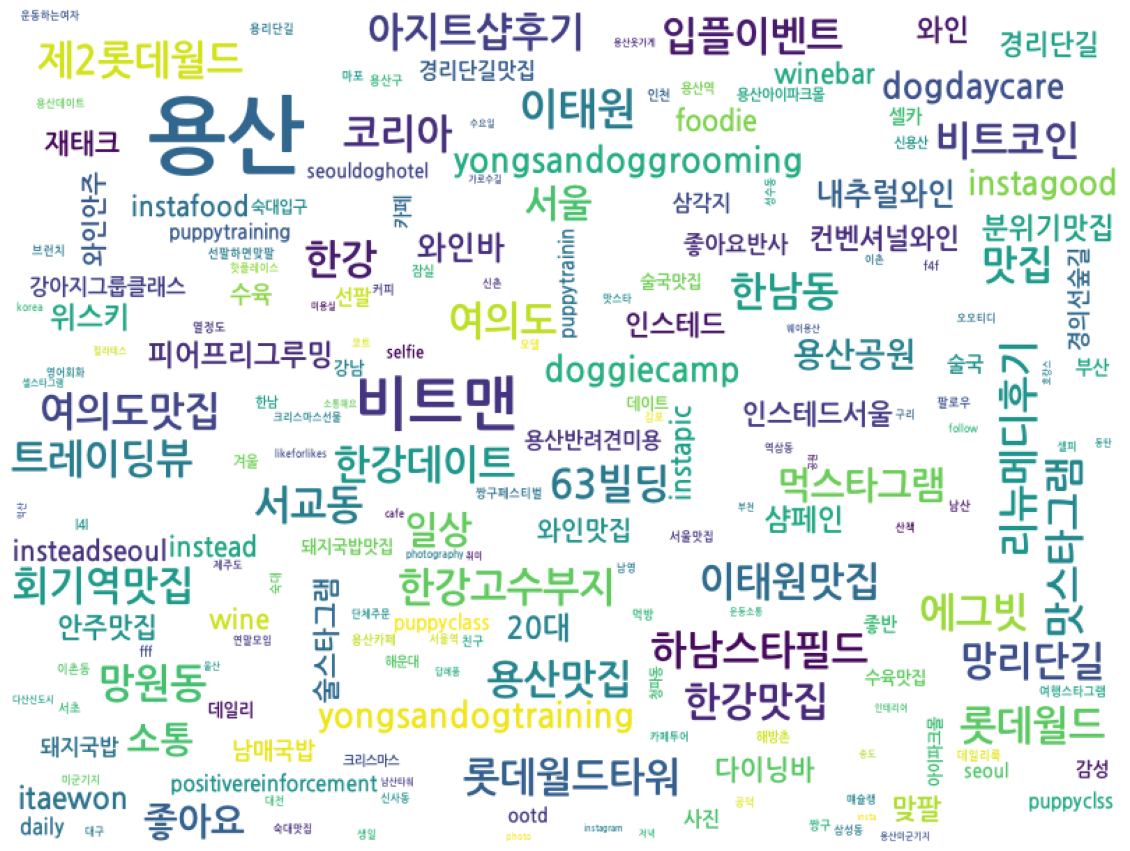

In [96]:
from PIL import Image 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import numpy as np 
from PIL import Image 
import matplotlib 
#matplotlib.rcParams['font.family'] = "Maulgun Gothic" 
#font_path="C:/Windows/Fonts/NanumGothic.ttf" 

#denne_mask = np.array(Image.open('cloud.png')) 
#wc = WordCloud(font_path=font_path, background_color="white", width=800, height=600, mask = denne_mask) 
#cloud = wc.generate_from_frequencies(dict(common_tag)) 
#plt.figure(figsize = (20, 16)) 
#plt.axis('off') 
#plt.imshow(cloud)

font_path = 'NanumGothicBold.otf'
wc =  WordCloud(font_path=font_path,background_color="white", width=800, height=600,max_font_size=60)
print()
cloud = wc.generate_from_frequencies(dict(common_tag))
   
plt.figure(figsize=(20,16))
plt.axis('off')
plt.imshow(cloud)
plt.show()

cloud.to_file('wordcloud.jpg')